Include all the dependencies

In [44]:
import numpy as np

def gauss1D(m, v, N, w):
    pos = np.arange(-w, w - w / N, 2 * w / N)
    insE = -0.5 * ((pos - m) / v) ** 2
    norm = 1 / (v * np.sqrt(2 * np.pi))
    res = norm * np.exp(insE)
    realDensity = np.stack((pos, res), axis=1)
    return realDensity

def parameters():
    h = 0.4  # kde window size / radius
    return h

The kernel function to estimate the density at the pos vector

In [36]:
def kde(samples, h):
    # compute density estimation from samples with KDE
    # Input
    #  samples    : DxN matrix of data points
    #  h          : (half) window size/radius of kernel
    # Output
    #  estDensity : estimated density in the range of [-5,5]

    #####Insert your code here for subtask 5a#####
    # Compute the number of samples created
    n = len(samples)
    
    #create a linearly spaced array for estimating density
    pos = np.arange(-5, 5.0, 0.1)
    
    #for every pos in pos i have to find the density estimate using the samples
    deno = np.sqrt(2*np.pi) * h * n
    D_est = np.sum(np.exp(-(pos[np.newaxis,:] - samples[:,np.newaxis])**2 / (2*h**2)), axis = 0) / deno
    
    #Estimate of each point in pos 
    estDensity = np.stack((pos,D_est), axis = 1)
    
    return estDensity

Visualization for understanding the influence of 'h'

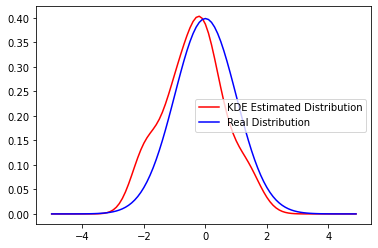

In [45]:
import matplotlib.pyplot as plt
h = parameters()

# Produce the random samples
samples = np.random.normal(0, 1, 100)

# Compute the original normal distribution
realDensity = gauss1D(0, 1, 100, 5)

# Estimate the probability density using the KDE
estDensity = kde(samples, h)


# plot results
# plt.subplot(2, 1, 1)
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KDE Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
